In [3]:
import MetaTrader5 as mt5
import numpy as np
import requests
from bs4 import BeautifulSoup
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import joblib
import matplotlib.pyplot as plt

print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)

mt5.initialize()

MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.45


True

In [2]:
import keras
import tensorflow as tf
print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

Keras version: 2.14.0
TensorFlow version: 2.14.0


In [5]:
if not mt5.initialize():
    print('Initialization failed, check internet connection. You must have Meta Trader 5 installed.')
    mt5.shutdown()

else:
    print(mt5.account_info()._asdict())
    print("\n")
    print(mt5.terminal_info()._asdict())
    print("\n")
    print(mt5.symbols_total())
    
    
# you code here


{'login': 5015722610, 'trade_mode': 0, 'leverage': 100, 'limit_orders': 200, 'margin_so_mode': 0, 'trade_allowed': True, 'trade_expert': True, 'margin_mode': 2, 'currency_digits': 2, 'fifo_close': False, 'balance': 10000.0, 'credit': 0.0, 'profit': 0.0, 'equity': 10000.0, 'margin': 0.0, 'margin_free': 10000.0, 'margin_level': 0.0, 'margin_so_call': 50.0, 'margin_so_so': 30.0, 'margin_initial': 0.0, 'margin_maintenance': 0.0, 'assets': 0.0, 'liabilities': 0.0, 'commission_blocked': 0.0, 'name': 'mike bright', 'server': 'MetaQuotes-Demo', 'currency': 'USD', 'company': 'MetaQuotes Software Corp.'}


{'community_account': True, 'community_connection': True, 'connected': True, 'dlls_allowed': False, 'trade_allowed': True, 'tradeapi_disabled': False, 'email_enabled': False, 'ftp_enabled': False, 'notifications_enabled': False, 'mqid': False, 'build': 4000, 'maxbars': 100000, 'codepage': 0, 'ping_last': 197732, 'community_balance': 0.0, 'retransmission': 0.0, 'company': 'MetaQuotes Software C

In [6]:
account = mt5.account_info()
terminal = mt5.terminal_info()

print(account.equity)

if(terminal.connected == True and terminal.trade_allowed == True):
    print("AI is successfully functional")
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")
    

10000.0
AI is successfully functional


In [7]:
#rates = mt5.copy_rates_from_pos("GBPUSD", mt5.TIMEFRAME_H1, 0, 99999)  
target_market = ["GBPUSD","EURUSD","AUDUSD","USDCAD","USDCHF","EURGBP","XAUUSD"]


In [8]:
url = "https://www.dailyfx.com/forex-rates#currencies"
response = requests.get(url)

In [9]:
soup = BeautifulSoup(response.content, "html.parser")
currencies_news = soup.find("div",id = "currencies")

currencies_news = currencies_news.find("div",class_="dfx-instrumentTiles row")
#print(currencies_news)



In [11]:
models_location = [
    "metatrader 5 data H1/GBPUSD 1695376800.0.keras.h5",
    "metatrader 5 data H1/EURUSD 1695376800.0.keras.h5",
    "metatrader 5 data H1/AUDUSD 1695376800.0.keras.h5",
    "metatrader 5 data H1/USDCAD 1695376800.0.keras.h5",
    "metatrader 5 data H1/USDCHF 1695376800.0.keras.h5",
    "metatrader 5 data H1/EURGBP 1695376800.0.keras.h5",
    "metatrader 5 data H1/XAUUSD 1695362400.0.keras.h5"
]


xauusd_sc_location = [
    "metatrader 5 data H1/XAUUSD sc_x.joblib",
    "metatrader 5 data H1/XAUUSD sc_y.joblib"
]

models = []

In [12]:
model = load_model("metatrader 5 data H1/AUDUSD 1695376800.0.keras.h5")
model.compile(
    loss='mse',
    optimizer= Adam(learning_rate=0.02)
)

model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 94999, 1)]        0         
                                                                 
 lstm (LSTM)                 (None, 94999, 512)        1052672   
                                                                 
 lstm_1 (LSTM)               (None, 94999, 256)        787456    
                                                                 
 lstm_2 (LSTM)               (None, 94999, 128)        197120    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129   

In [13]:
for location in models_location:
    print(location)
    model = load_model(location)
    
    # Compile the model
    model.compile(
        loss='mse',
        optimizer= Adam(learning_rate=0.02)
    )
    
    models.append(model)

metatrader 5 data H1/GBPUSD 1695376800.0.keras.h5
metatrader 5 data H1/EURUSD 1695376800.0.keras.h5
metatrader 5 data H1/AUDUSD 1695376800.0.keras.h5
metatrader 5 data H1/USDCAD 1695376800.0.keras.h5
metatrader 5 data H1/USDCHF 1695376800.0.keras.h5
metatrader 5 data H1/EURGBP 1695376800.0.keras.h5
metatrader 5 data H1/XAUUSD 1695362400.0.keras.h5


In [14]:
s = 0
market_rates = []
for market in target_market:
    rates = mt5.copy_rates_from_pos(market, mt5.TIMEFRAME_H1, 0, 99999)
    if(market == "XAUUSD" or market == "Gold"):
        for i in range(len(rates)):
            if(rates[i][0] == 1670583600):
                s = i
                break
        print("match detected for Gold")
    else:
        for i in range(len(rates)):
            if(rates[i][0] == 1669172400):
                s = i
                break
        print("match detected")

    rates = rates[s:-1]    
    market_rates.append(rates)
    s=0

match detected
match detected
match detected
match detected
match detected
match detected
match detected for Gold


In [15]:
for i in range(len(market_rates)):
    print(market_rates[i].shape)

print(market_rates)

(5397,)
(5397,)
(5396,)
(5396,)
(5397,)
(5396,)
(4818,)
[array([(1669172400, 1.18899, 1.18979, 1.18758, 1.18841, 10026, 0, 0),
       (1669176000, 1.18842, 1.1894 , 1.1878 , 1.18932,  5898, 5, 0),
       (1669179600, 1.18933, 1.18933, 1.18757, 1.18792,  5937, 6, 0), ...,
       (1696435200, 1.21698, 1.21735, 1.21453, 1.21486,  5561, 0, 0),
       (1696438800, 1.21487, 1.21548, 1.21062, 1.21151,  9769, 0, 0),
       (1696442400, 1.21151, 1.21566, 1.21095, 1.21546,  5400, 0, 0)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')]), array([(1669172400, 1.03056, 1.03137, 1.03005, 1.0311 , 3592, 0, 0),
       (1669176000, 1.03109, 1.03249, 1.03077, 1.03239, 2294, 0, 0),
       (1669179600, 1.03239, 1.03239, 1.03117, 1.03155, 1872, 0, 0), ...,
       (1696435200, 1.05254, 1.0526 , 1.05054, 1.05074, 4648, 0, 0),
       (1696438800, 1.05072, 1.05118, 1.04831, 1.04929, 8236, 0, 0),


In [16]:
markets_open = []
markets_close = []
t_open = []
t_close = []
#dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])]
#print(market_rates[0])
for i in range(len(market_rates)):
    for ii in range(len(market_rates[i])):
        #print(market_rates[i][ii]," target")
        t_open.append(market_rates[i][ii][1])
        t_close.append(market_rates[i][ii][4])
    markets_open.append(t_open)
    markets_close.append(t_close)
    t_open = []
    t_close = []

    print(i)
print(markets_close)
print(markets_open)

0
1
2
3
4
5
6
[[1.18841, 1.18932, 1.18792, 1.18783, 1.18859, 1.18894, 1.19032, 1.18914, 1.19194, 1.19256, 1.19387, 1.1942, 1.19706, 1.20203, 1.20661, 1.20395, 1.20292, 1.20265, 1.20652, 1.20655, 1.20532, 1.20514, 1.20761, 1.20735, 1.20882, 1.20927, 1.21022, 1.21085, 1.20929, 1.20827, 1.20819, 1.20656, 1.20935, 1.21097, 1.21266, 1.21168, 1.21172, 1.21461, 1.21401, 1.21209, 1.21237, 1.21125, 1.21189, 1.21188, 1.21163, 1.21137, 1.21117, 1.21008, 1.21008, 1.21068, 1.21107, 1.21229, 1.21003, 1.21123, 1.20911, 1.21096, 1.20804, 1.21088, 1.20858, 1.20885, 1.20795, 1.2083, 1.20948, 1.2099199999999999, 1.2095, 1.20871, 1.20954, 1.20965, 1.20913, 1.20673, 1.2053099999999999, 1.2068, 1.20381, 1.2053, 1.20463, 1.20549, 1.2049400000000001, 1.20674, 1.2065299999999999, 1.21014, 1.20873, 1.20856, 1.20945, 1.2095799999999999, 1.20755, 1.20507, 1.2038, 1.20385, 1.2000899999999999, 1.19745, 1.1952099999999999, 1.19481, 1.19554, 1.19597, 1.19589, 1.19668, 1.19891, 1.19841, 1.20031, 1.20197, 1.20114, 1.19

In [21]:
n = 3 # 0 means first market
open_price = np.array(markets_open[n])# x value
close_price = np.array(markets_close[n])# y value
open_price = open_price.reshape((len(open_price),1))
if(n == 6):
    sc_x = joblib.load('metatrader 5 data H1/XAUUSD sc_x.joblib')
    sc_y = joblib.load('metatrader 5 data H1/XAUUSD sc_y.joblib')
    open_price = sc_x.transform(open_price)
    close_price = sc_y.transform(close_price.reshape((len(close_price),1)))
    model = models[n]
    y_pred = model.predict(open_price)
    close_price = close_price.reshape(-1)
else:
    model = models[n]
    y_pred = model.predict(open_price)
print(close_price.shape)
print(y_pred.shape)
#print(y_pred)

169/169 [==============================] - 3s 7ms/step
(5396,)
(5396, 1)


In [22]:
def r_squared(y_true, y_pred):
  """Calculates the R-squared score.

  Args:
    y_true: The ground truth values.
    y_pred: The predicted values.

  Returns:
    The R-squared score.
  """

  mean_y_true = np.mean(y_true)
  ss_tot = np.sum((y_true - mean_y_true)**2)
  ss_res = np.sum((y_true - y_pred)**2)
  r_squared = 1 - ss_res / ss_tot
  return r_squared

y_pred = y_pred.reshape(-1)
r_squared = r_squared(close_price, y_pred)

print(r_squared)

0.9941624811066558


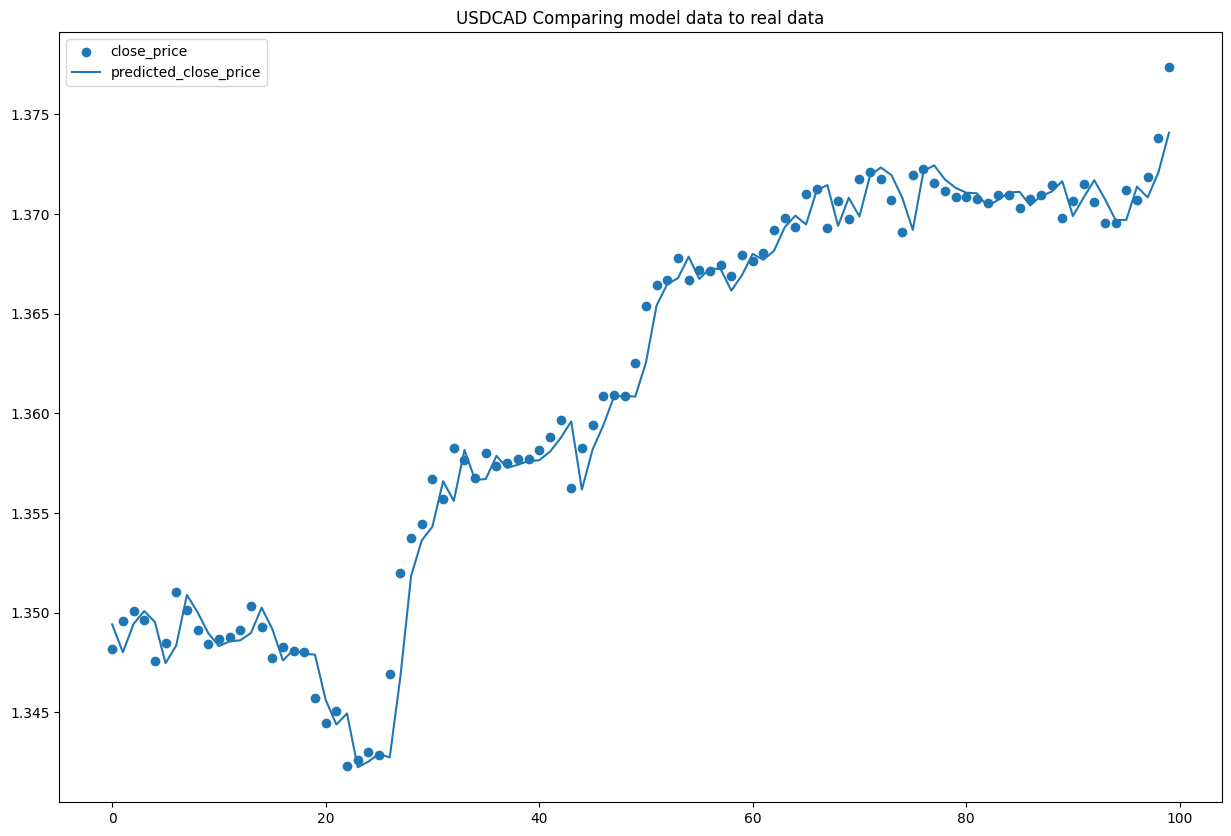

In [23]:
plt.figure(figsize=(15, 10))
plt.title(target_market[n]+" Comparing model data to real data")
x_point = []

for i in range(len(close_price[-100:])):
  x_point.append([i])
plt.scatter(x_point, close_price[-100:], label="close_price")
#plt.plot(open_price,label="open price")

plt.plot(y_pred[-100:], label="predicted_close_price")

plt.legend()
plt.show()

In [246]:
# top market are:- 
t_market = [target_market[3],target_market[4],target_market[6]]
print(t_market)

['USDCAD', 'USDCHF', 'XAUUSD']


In [24]:
n = 3 # 0 means first market
open_price = np.array(markets_open[n])# x value
close_price = np.array(markets_close[n])# y value
open_price = open_price.reshape((len(open_price),1))
model = models[n]
if(n == 6):
    sc_x = joblib.load('metatrader 5 data H1/XAUUSD sc_x.joblib')
    sc_y = joblib.load('metatrader 5 data H1/XAUUSD sc_y.joblib')
    open_price = sc_x.transform(open_price)
    close_price = sc_y.transform(close_price.reshape((len(close_price),1)))
    y_pred = model.predict(open_price)
    close_price = close_price.reshape(-1)
else:
    y_pred = model.predict(open_price)
print(close_price.shape)
print(y_pred.shape)

  1/169 [..............................] - ETA: 5s

169/169 [==============================] - 1s 7ms/step
(5396,)
(5396, 1)


In [25]:
print(open_price[-1])
print(y_pred[-1])
#creating an assumption
t_open_price = open_price
a_y_pred = model.predict(open_price)
#t_open_price= np.concatenate((t_open_price,[a_y_pred[-1]]))
#a_y_pred = model.predict(t_open_price)
print(t_open_price.shape)
print(a_y_pred.shape)
t_open_price= np.concatenate((t_open_price,[a_y_pred[-1]]))
a_y_pred = model.predict(t_open_price)

print(t_open_price.shape)
print(a_y_pred.shape)



[1.37383]
[1.3740798]
169/169 [==============================] - 1s 6ms/step
(5396, 1)
(5396, 1)
169/169 [==============================] - 1s 6ms/step
(5397, 1)
(5397, 1)


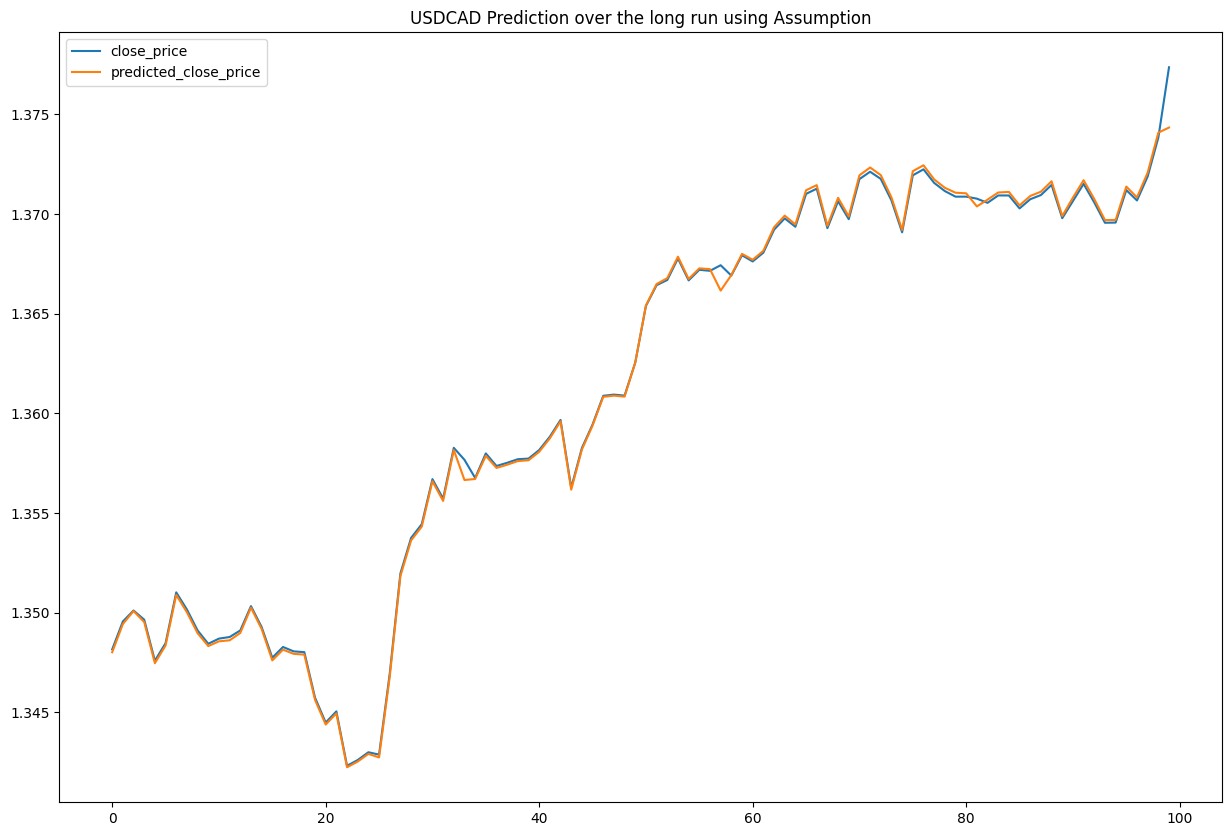

In [27]:
plt.figure(figsize=(15, 10))
plt.title(target_market[n]+" Prediction over the long run using Assumption")
plt.plot(close_price[-100:],label="close_price")
plt.plot(a_y_pred[-100:], label="predicted_close_price")

plt.legend()
plt.show()

In [4]:
print(mt5.last_error())


(1, 'Success')


In [ ]:
mt5.shutdown()